<a href="https://colab.research.google.com/github/ottl-seo/biometric-security/blob/main/PCA2_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PCA 실습 (2)
# **Iris** 데이터 분석 과제

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

### 데이터셋을 데이터프레임으로 변환
pandas의 데이터프레임 함수를 이용하여, 보기 편하게 세팅   

In [ ]:
# 데이터프레임으로 변환하자
irisDF = pd.DataFrame(data=iris.data,
                      columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3) # 데이터 요약해서 출력
print(irisDF)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


### K-means 모델을 이용하여, 군집화 과정 진행
아래에 나온 결과 0,1,2는 **집단 0, 1, 2**를 가리킨다.    




In [ ]:
# kmeans 군집화 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

# kmeans.labels_ 속성으로 각 데이터가 어떤 중심에 속하는지 확인하기
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
# 군집화가 효과적으로 되었는지 확인

irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()

print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


In [ ]:
## 시각화 (4단계)
# 2차 평면 시각화를 위해 4차원의 데이터를 축소한다.
# PCA 주성분분석을 이용!

from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2차원으로 축소
pca_trans = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_trans[:,0] # x축 (2차원 중 앞의 데이터)
irisDF['pca_y'] = pca_trans[:,1] # y축 (뒤의 데이터)

irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


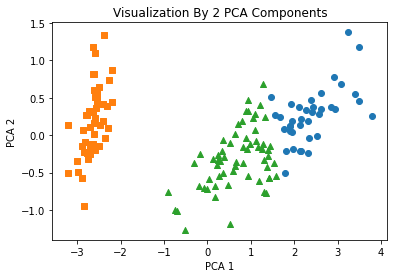

In [ ]:
## 2차 평면에 나타내기

# 군집값이 0,1,2인 경우마다 별도의 인덱스로 추출
index0 = irisDF[irisDF['cluster']==0].index
index1 = irisDF[irisDF['cluster']==1].index
index2 = irisDF[irisDF['cluster']==2].index

plt.scatter(x=irisDF.loc[index0, 'pca_x'], y=irisDF.loc[index0, 'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[index1, 'pca_x'], y=irisDF.loc[index1, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[index2, 'pca_x'], y=irisDF.loc[index2, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualization By 2 PCA Components')

plt.show()